## Lead Scoring Case Study

### Step1 :  Import Libraries and Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

 #Libraries for Data analysis
import numpy as np , pandas as pd

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

pd.options.display.max_columns = None

In [2]:
# Importing lead dataset
lead_df = pd.read_csv('Leads.csv')

### Step 2 : Understanding the data

In [3]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
#Checking the shape of the data
lead_df.shape

(9240, 37)

In [5]:
# checking non null count and datatype of the variables
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Describing the data
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
#Calculate the percentage the null values in the dataframe

round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### We can observe that there are many columns having significant number of missing values. These columns when included in the analysis might impact the model. Hence we will drop the columns having more than 40% of missing values

### Step 3 : Data Cleaning

In [8]:
#Dropping the variable having more than 40% of missing values
leads_df = lead_df.drop(columns=['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [9]:
#dropping Lead Number and Prospect ID since they do not add value to the model

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
# Converting 'Select' values to NaN.
leads_df = leads_df.replace('Select', np.nan)

In [11]:
round(100*(leads_df.isnull().sum()/len(leads_df)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Since there are more missing values in 'How did you hear about X Education' and 'Lead Profile' . we will drop this columns.

In [12]:
leads_df.drop(['How did you hear about X Education', 'Lead Profile'], 1, inplace = True)

#### Treating other columns with missing values

#### a) Analyse 'Do Not Call' Column

In [13]:
#Analysing the 'Do Not Call' Column

leads_df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

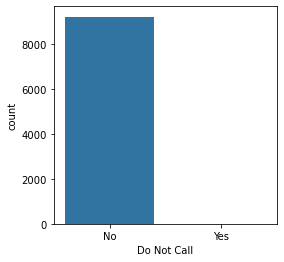

In [14]:
plt.figure(figsize=[4,4])
sns.countplot(leads_df['Do Not Call'])
plt.show()

#### The Do Not Call coulmn has the majority of the information as No which will affect the model and do not add and value in model building. Hence we can drop the column from analysis

In [15]:
leads_df = leads_df.drop(columns=['Do Not Call'])

#### b) Analyse 'Country' Column

In [16]:
#Analysing the 'Country' Column

leads_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

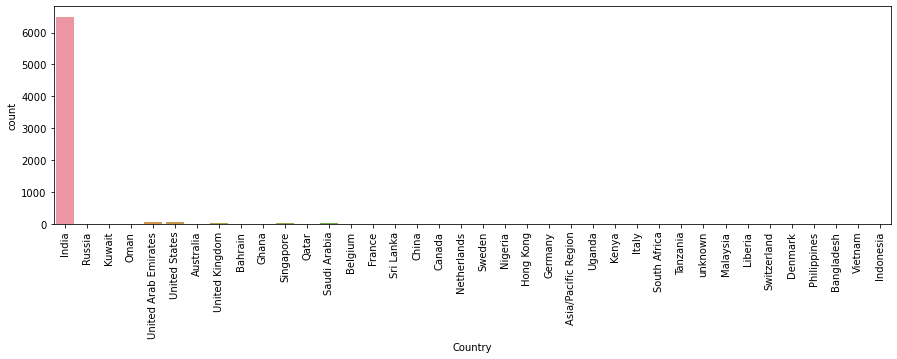

In [17]:
#Visualize the data 

plt.figure(figsize=[15,4])
sns.countplot(leads_df['Country'])
plt.xticks(rotation = 90)
plt.show()

#### There are 26 % of missing values in this column and considering this a an important coulumn for analysis, we will impute the missing values as India

In [18]:
leads_df["Country"] = leads_df['Country'].replace(np.nan,'India')

#### c)Analyse 'Specialization' Column

In [19]:
#Analysing the 'Specialization' Column

leads_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

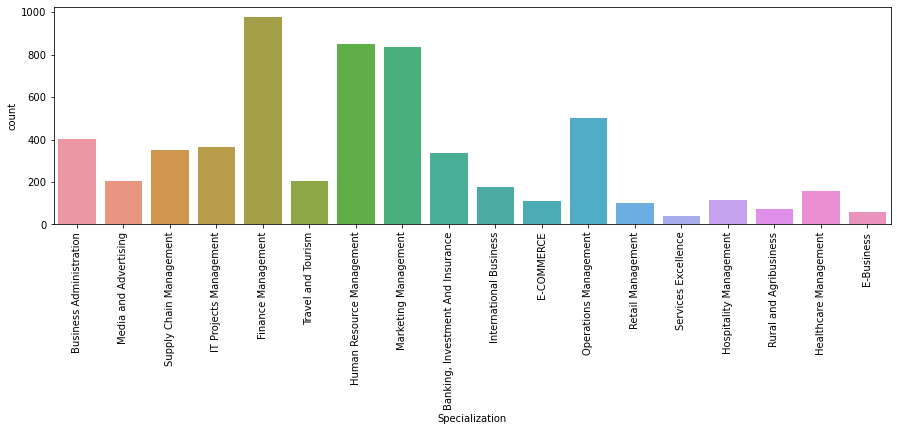

In [20]:
#Visualize the data

plt.figure(figsize=[15,4])
sns.countplot(leads_df['Specialization'])
plt.xticks(rotation = 90)
plt.show()

#### 36% of the values in this cloumns are missing. Considering the significance of this column we cannot drop and hence we will create another bucket for the missing values

In [21]:
leads_df["Specialization"] = leads_df['Specialization'].replace(np.nan,'Others')

#### d) Analyse 'What is your current occupation' Column

In [22]:
#Analysing the 'What is your current occupation' Column

leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

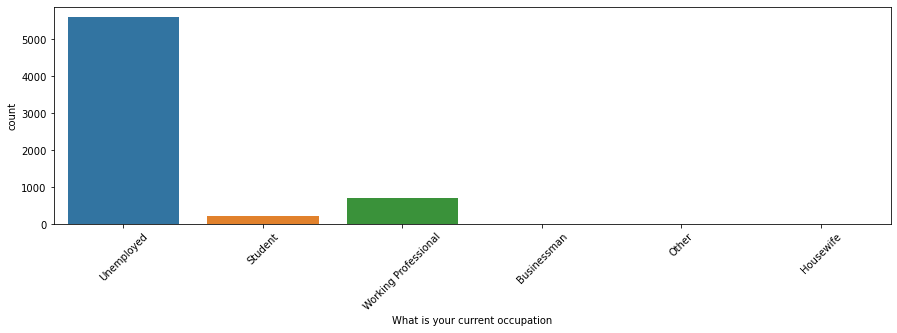

In [23]:
#Visualize the data

plt.figure(figsize=[15,4])
sns.countplot(leads_df['What is your current occupation'])
plt.xticks(rotation = 45)
plt.show()

#### Since the majority of the category is Unemployed we will create a new bucket of Not Provided

In [24]:
leads_df["What is your current occupation"] = leads_df['What is your current occupation'].replace(np.nan,'Not Provided')

#### e) Analyse 'What matters most to you in choosing a course ' Column

In [25]:
#Analysing the 'What matters most to you in choosing a course ' Column

leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

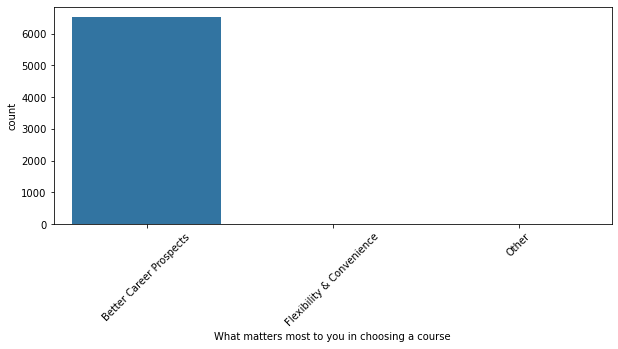

In [26]:
#Visualize the data

plt.figure(figsize=[10,4])
sns.countplot(leads_df['What matters most to you in choosing a course'])
plt.xticks(rotation = 45)
plt.show()

#### Since this data is highly skewed we will drop the column as it will not add any value in model building

In [27]:
leads_df = leads_df.drop('What matters most to you in choosing a course',axis=1)

#### f) Analyse the 'Tags' Column

In [28]:
#Analysing the 'Tags' Column

leads_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

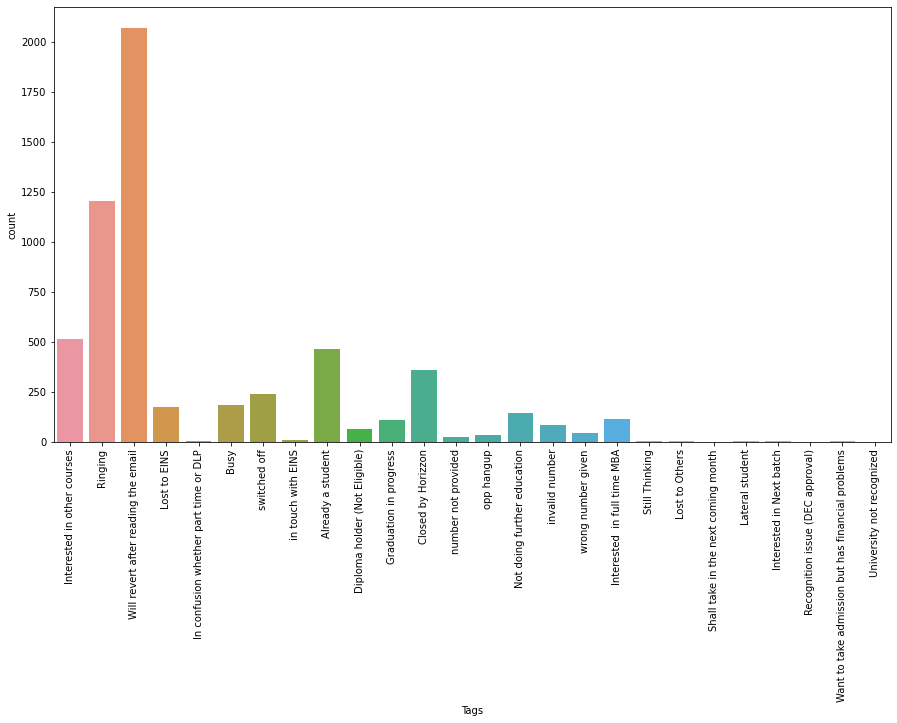

In [29]:
#Visualize the data

plt.figure(figsize=[15,8])
sns.countplot(leads_df['Tags'])
plt.xticks(rotation = 90)
plt.show()

#### Most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [30]:
leads_df['Tags']=leads_df['Tags'].replace(np.nan,'Will revert after reading the email')

#### g) Analyse the 'City' Column

In [31]:
#Analysing the 'City' Column

leads_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

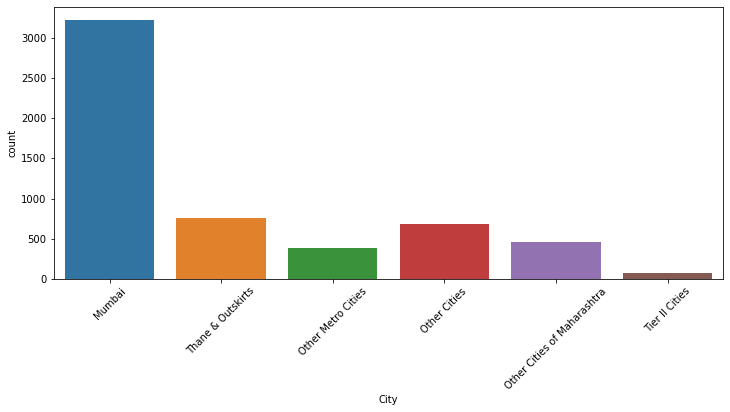

In [32]:
#Visualize the data

plt.figure(figsize=[12,5])
sns.countplot(leads_df['City'])
plt.xticks(rotation = 45)
plt.show()

#### Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [33]:
leads_df['City']=leads_df['City'].replace(np.nan,'Mumbai')

In [34]:
#Check the null value Columns

round(100*(leads_df.isnull().sum()/len(leads_df)),2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

#### Since the rest of the missing values are just over 1%, we can remove those values alone

In [35]:
#Drop the values in rows with null values

leads_df.dropna(inplace=True)

In [36]:
#Check the shape of the data again
leads_df.shape

(9074, 26)

In [37]:
round(100*(leads_df.isnull().sum()/len(leads_df)),2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [38]:
leads_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website   India                   Others   
1             Email Opened   India                   Others   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Others   

  What is your current occupation Search Magazine Newspaper Article  \
0                      Unemployed     No       No                No   
1                      Unemployed     No       No                No   
2                         Student     No       No                No   
3                      Unemployed     No       No                No   
4                      Unemployed     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Mumbai   
1                                No                        No  Mumbai   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

## Exploratory Data Analysis

### Step 4: Univariate and BiVariate Analysis

In [39]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Converted                                 9074 non-null   int64  
 4   TotalVisits                               9074 non-null   float64
 5   Total Time Spent on Website               9074 non-null   int64  
 6   Page Views Per Visit                      9074 non-null   float64
 7   Last Activity                             9074 non-null   object 
 8   Country                                   9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  What is your current occupation     

#### 1) Analyse 'Lead Origin','Lead Source','Do Not Email','Last Activity' Vs 'Converted'

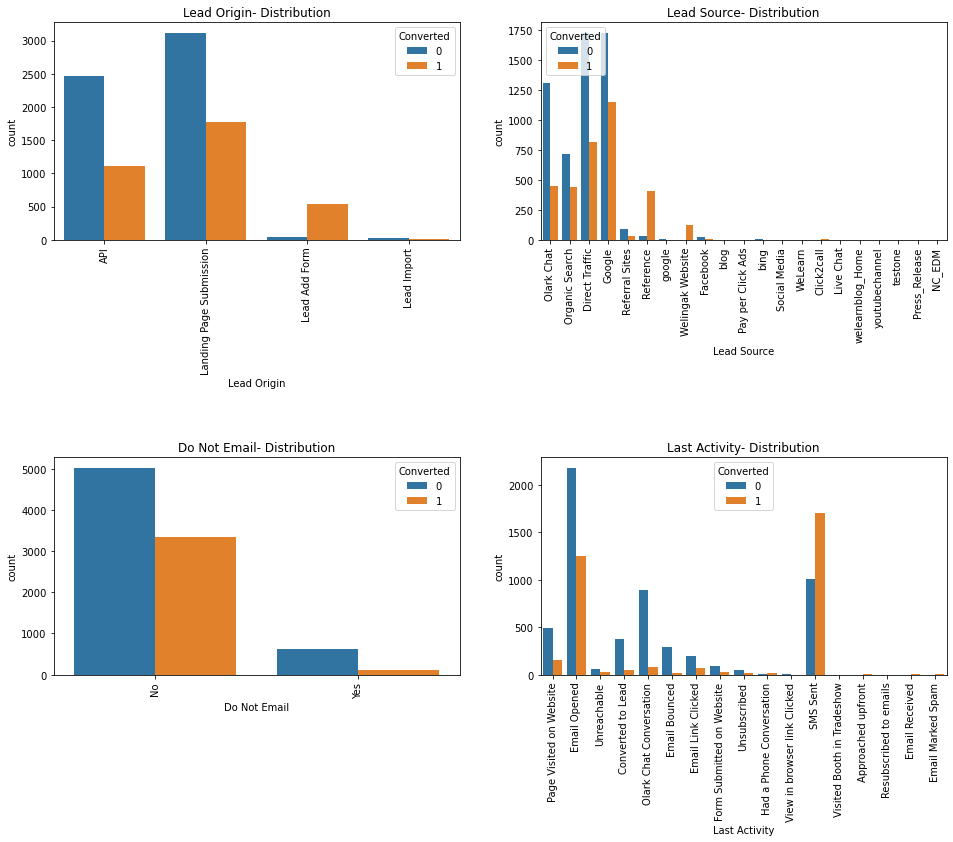

In [40]:
col_list_1 = ['Lead Origin','Lead Source','Do Not Email','Last Activity']

plt.figure(figsize=[16,12])

for i in range(len(col_list_1)):
    plt.subplot(2,2,i+1)
    var = col_list_1[i]
    sns.countplot(x=var,hue='Converted',data=leads_df)
    plt.title(var+'- Distribution')
    plt.xticks(rotation = 90)
    plt.subplots_adjust(hspace=1)

##### Inferences: 

##### Lead Origin - The conversion from 'API' and 'Landing Page submissions' are significant when compared to others categories
##### Lead Origin -  There is high conversion rate in 'high in Lead add form' though the lead volume is less.
##### Lead Source - Google and Direct traffic generates maximum number of leads.
##### Lead Source - Conversion Rate of reference leads and leads through welingak website is high.
##### Do Not Email - Though leads have selected 'No' Email, few have them have still got converted.
##### Last Activity - Conversion rate for leads with last activity as SMS Sent is high when compared to others.

#### 2) Analyse the 'Country','Specialization','What is your current occupation','Search' Vs 'Converted

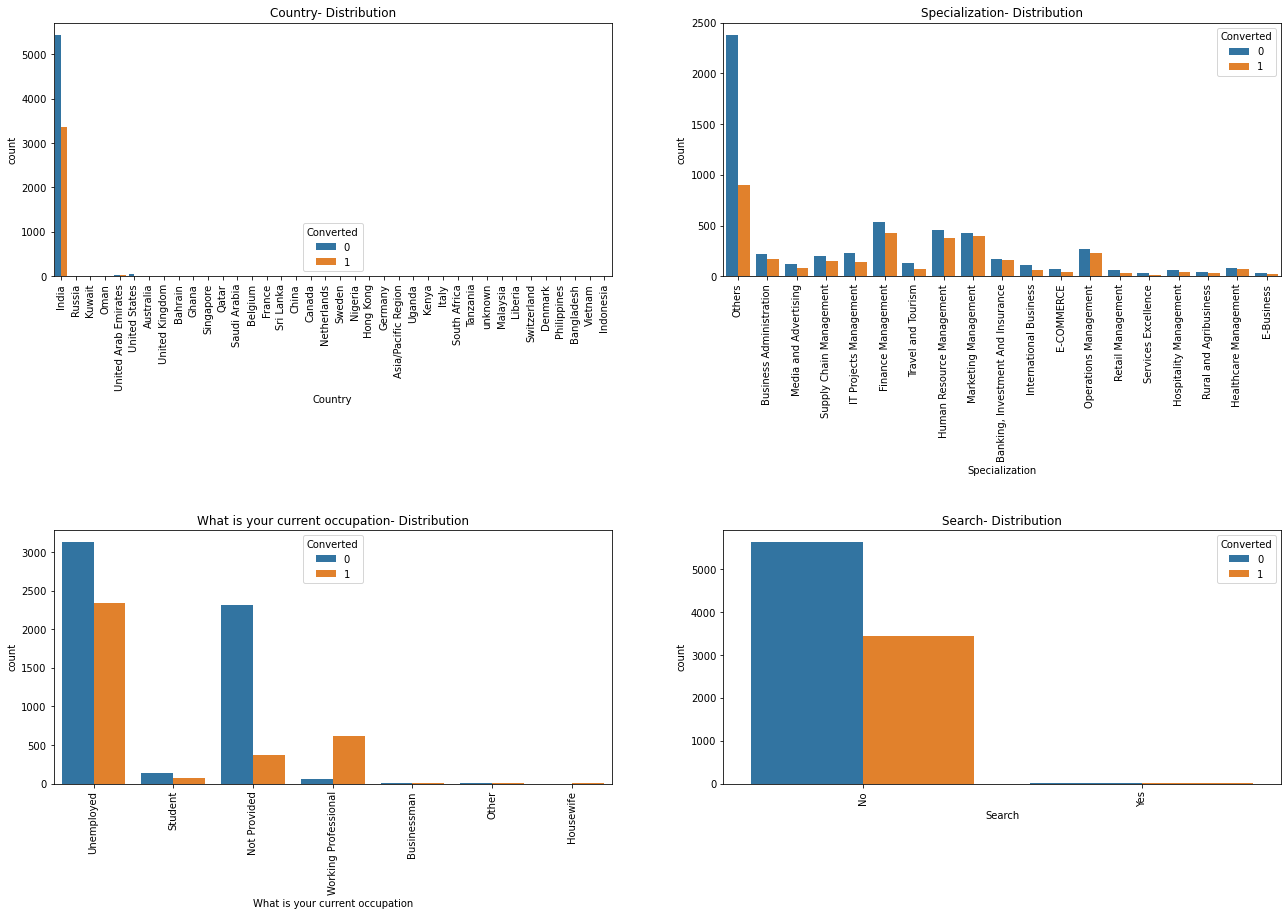

In [41]:
col_list_2 = ['Country','Specialization','What is your current occupation','Search']

plt.figure(figsize=[22,14])

for i in range(len(col_list_2)):
    plt.subplot(2,2,i+1)
    var = col_list_2[i]
    sns.countplot(x=var,hue='Converted',data=leads_df)
    plt.title(var+'- Distribution')
    plt.xticks(rotation = 90)
    plt.subplots_adjust(hspace=1)

#### Inferences :
##### Current Occupation - The maximum leads are unemplyed and the conversion rate is also high.
##### Current Occupation - Conversion rate among the working professional is very high and need focus.
##### There is not much information from the other categories in terms of the conversion rate

#### 4) Analyse 'Magazine','Newspaper Article','X Education Forums','Newspaper' Vs 'Converted'

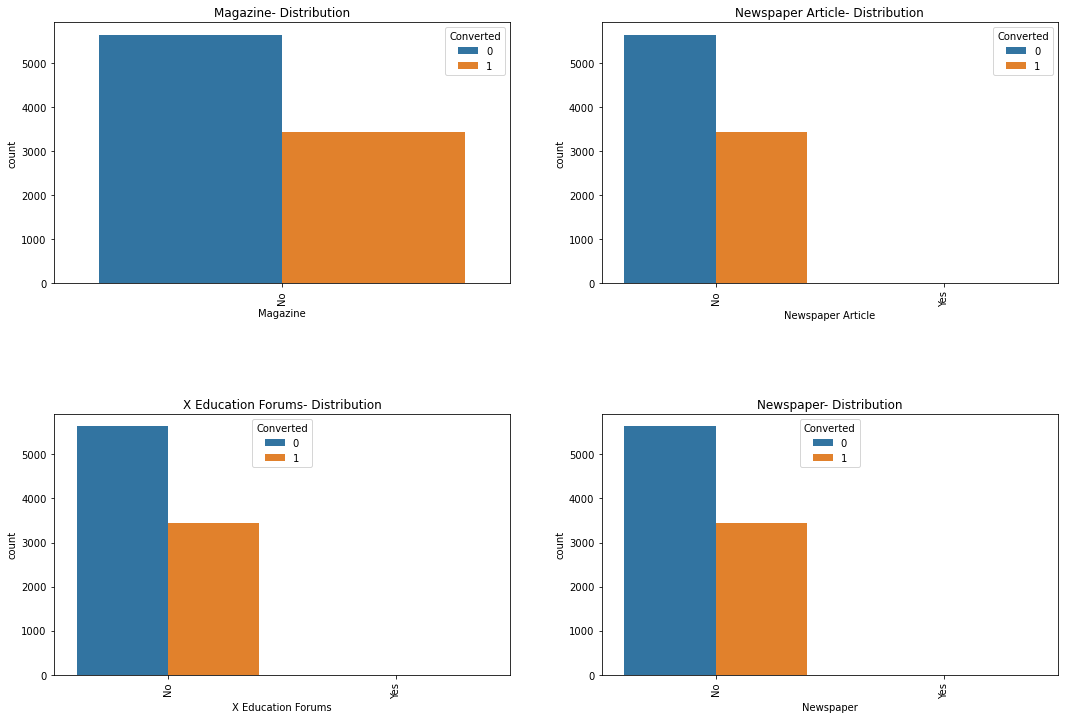

In [42]:
col_list_3 = ['Magazine','Newspaper Article','X Education Forums','Newspaper']

plt.figure(figsize=[18,12])

for i in range(len(col_list_3)):
    plt.subplot(2,2,i+1)
    var = col_list_3[i]
    sns.countplot(x=var,hue='Converted',data=leads_df)
    plt.title(var+'- Distribution')
    plt.xticks(rotation = 90)
    plt.subplots_adjust(hspace=0.5)

#### Inferences : Most of the categories have 'No' Values. Hence no inferneces can be made.

#### 5) Analyse 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags' Vs 'Converted

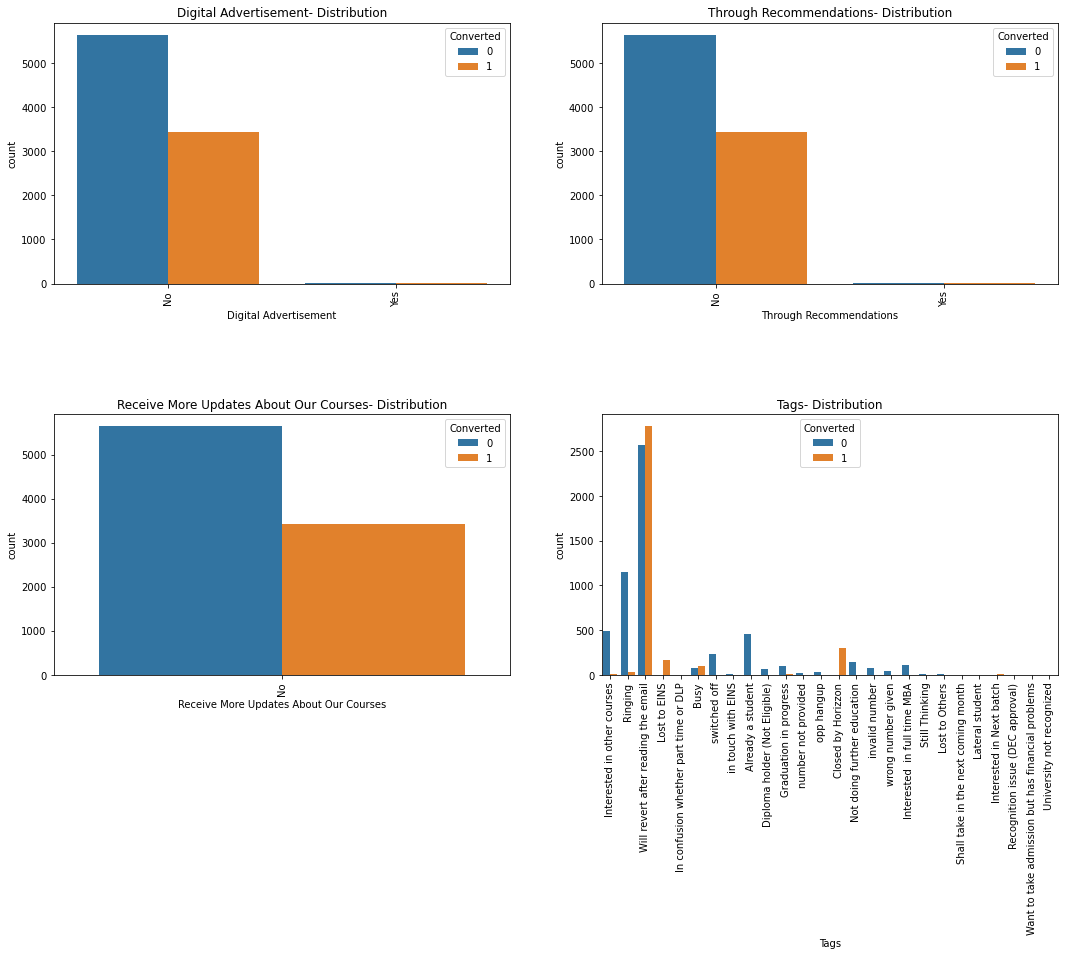

In [43]:
col_list_4 = ['Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags']

plt.figure(figsize=[18,12])

for i in range(len(col_list_4)):
    plt.subplot(2,2,i+1)
    var = col_list_4[i]
    sns.countplot(x=var,hue='Converted',data=leads_df)
    plt.title(var+'- Distribution')
    plt.xticks(rotation = 90)
    plt.subplots_adjust(hspace=0.5)

#### Inferences:

##### Tags - Based on the analysis made by the sales team customers who have agreed to revert after reading the email have mostly converted.
##### Rest of the categories most have 'No' hence an analysis is not possible.

#### 6) Analyse ' Update me on Supply Chain Content','City','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity' Vs ' Converted'

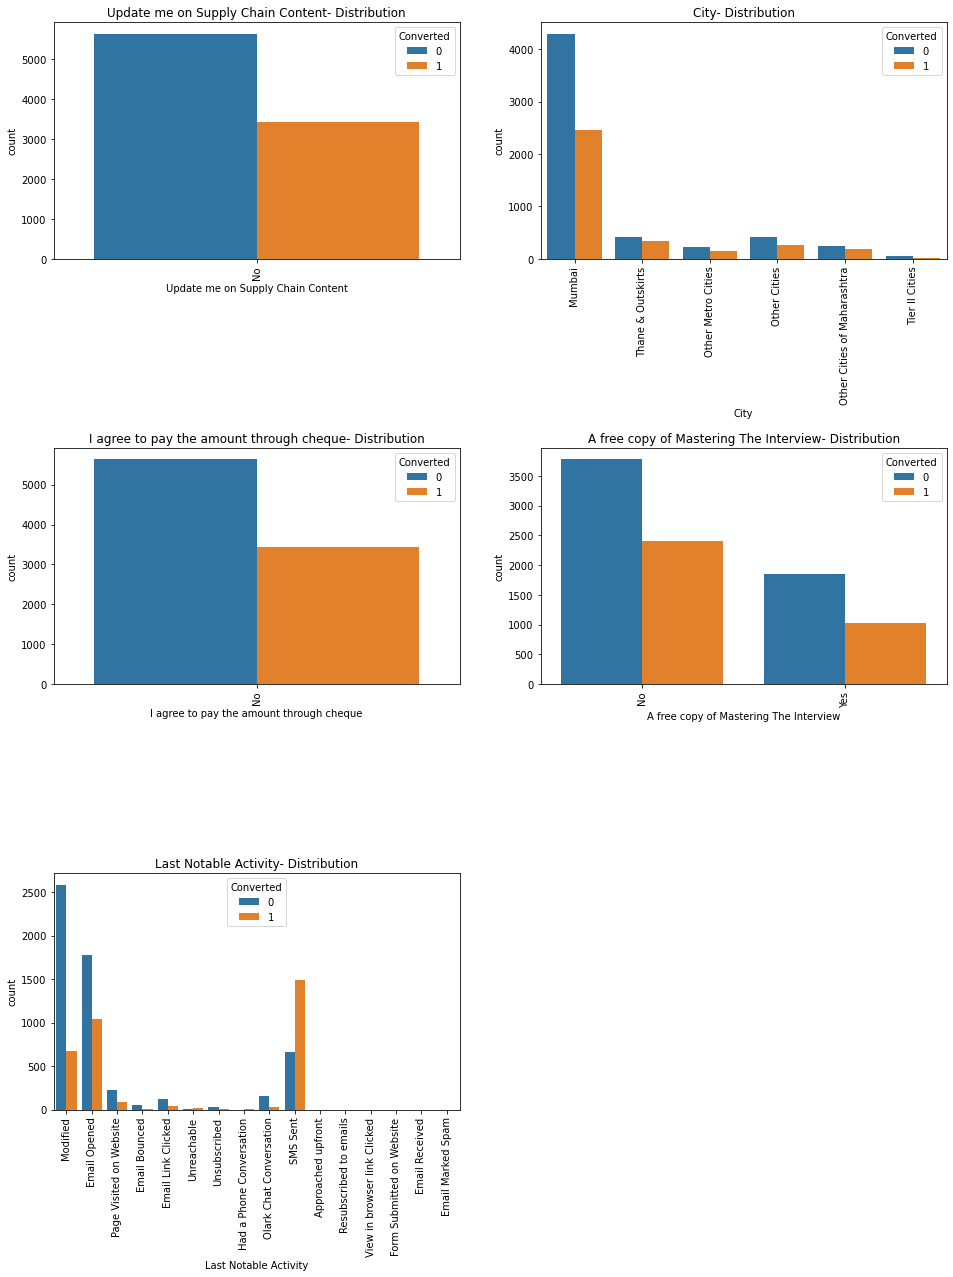

In [44]:
col_list_5 = ['Update me on Supply Chain Content','City','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']

plt.figure(figsize=[16,20])

for i in range(len(col_list_5)):
    plt.subplot(3,2,i+1)
    var = col_list_5[i]
    sns.countplot(x=var,hue='Converted',data=leads_df)
    plt.title(var+'- Distribution')
    plt.xticks(rotation = 90)
    plt.subplots_adjust(hspace=0.8)

#### Inferences:
##### City - Most of the customers who have converted are based out of Mumbai.
##### Mastering the interview - Though this category doesn't give a lot of inference, the customers who have brought a copy has convereted.
##### Last Notable Activity - Students who were contacted by SMS and who has opened the email have mostly converted.

In [45]:
#Verify the dataset again

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Converted                                 9074 non-null   int64  
 4   TotalVisits                               9074 non-null   float64
 5   Total Time Spent on Website               9074 non-null   int64  
 6   Page Views Per Visit                      9074 non-null   float64
 7   Last Activity                             9074 non-null   object 
 8   Country                                   9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  What is your current occupation     

#### 7) Analyse  'TotalVisits' Vs 'Converted'

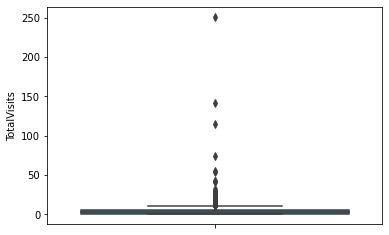

In [46]:
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

In [47]:
leads_df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [48]:
percentiles = leads_df['TotalVisits'].quantile([0.05,0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

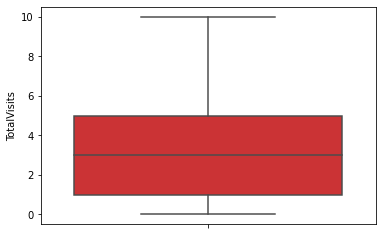

In [49]:
sns.boxplot(y=leads_df['TotalVisits'],orient='vert',palette='Set1')
plt.show()

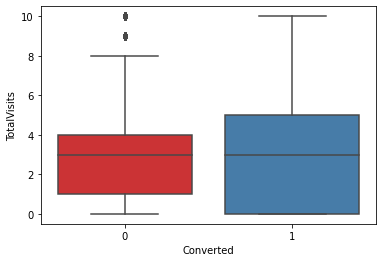

In [50]:
sns.boxplot(y=leads_df['TotalVisits'],x=leads_df['Converted'],orient='vert',palette='Set1')
plt.show()

#### Inferences:

##### The median of converted and non-converted are the same
##### There are a considerable amount of people who visitied upto 3 times have converted.

#### 8) Analyse 'Total Time Spent on Website' Vs Converted

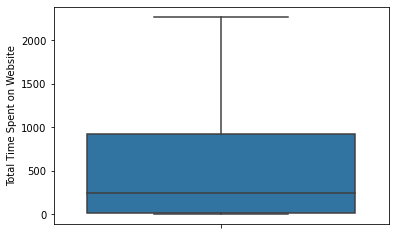

In [51]:
sns.boxplot(y=leads_df['Total Time Spent on Website'])
plt.show()

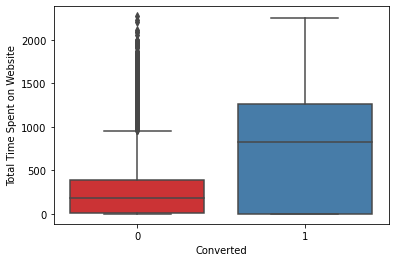

In [52]:
sns.boxplot(y=leads_df['Total Time Spent on Website'],x=leads_df['Converted'],orient='vert',palette='Set1')
plt.show()

#### Inferences: Leads who are spending more time on the websites are more likely to convert

#### Analyse 'Page Views Per Visit' Vs 'Converted

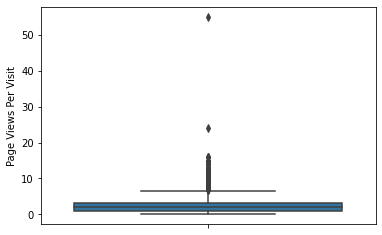

In [53]:
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

#### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis

In [54]:
percentiles = leads_df['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

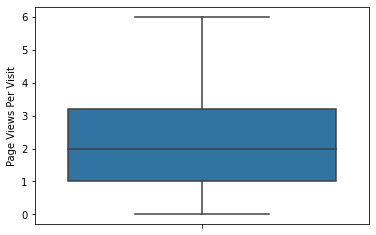

In [55]:
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

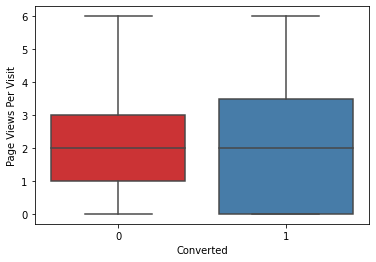

In [56]:
sns.boxplot(y=leads_df['Page Views Per Visit'],x=leads_df['Converted'],orient='vert',palette='Set1')
plt.show()

#### No Inferences can be made as the median value for the converted and non-converted are the same

#### Based on the analysis above, there are columns which is not adding any value to the model. hence we will drop them from the future analysis.

In [57]:
leads_df = leads_df.drop(['Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            ],1)

In [58]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [59]:
leads_df.shape

(9074, 14)

In [60]:
leads_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai                                     No              Modified  
1  Mumbai                                     No          Email Opened  
2  Mumbai                                    Yes          Email Opened  
3  Mumbai                                     No              Modified  
4  Mumbai                                     No              Modified

### Step 5 : Data Preparation

#### Creating Dummy variables for categorical columns

In [61]:
# Creating a dummy variable for the categorical variables and dropping the first one.
d_var = pd.get_dummies(leads_df[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity']])

In [62]:
d_var.head()

Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Click2call  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        0                       0   
4                          0                        0                       0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \
0                   0                    0                             0   
1                   0                    0                             0   
2                   0                    0                             0   
3                   0                    0                             0   
4                   0                    0                             0   

   Lead Source_youtubechannel  Last Activity_Approached upfront  \
0                           0                                 0   
1                           0                                 

In [63]:
# Concatenating the dummy_data to the lead_data dataframe
leads_df = pd.concat([leads_df,d_var],axis=1)
leads_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview Last Notable Activity  \
0  Mumbai                                     No              Modified   
1  Mumbai                                     No          Email Opened   
2  Mumbai                                    Yes          Email Opened   
3  Mumbai                                     No              Modified   
4  Mumbai                                     No              Modified   

   Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Click2call  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        0                       0   
4                          0                        0                       0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0           

#### We can drop the original columns for which the dummies are created and added.

In [64]:
leads_df = leads_df.drop(columns=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity'])

#### Converting Binary Variables to 1 and 0

In [65]:
c_var = ['Do Not Email','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [66]:
leads_df[c_var] = leads_df[c_var].apply(binary_map)

In [67]:
leads_df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Click2call  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        0                       0   
4                          0                        0                       0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0

### Step 6: Test-Train Split

In [68]:
X = leads_df.drop(['Converted'],axis=1)

In [69]:
y = leads_df['Converted']

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

#### Scaling of columns using Standard Scaler

In [71]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [72]:
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3009             -0.155018                                       1   
1012             -0.155018                                       0   
9226             -1.265540                                       0   
4750             -0.155018                                       0   
7987              0.122613                                       0   

      Lead Origin_API  Lead Origin_Landing Page Submission  \
3009                0                                    1   
1012                0                                    1   
9226                1                                    0   
4750                0                                    1   
7987                0                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Click2call  Lead Source_Direct Traffic  \
3009                       0                           1   
1012                       0                           1   
9226                       0                           0   
4750                       0                           1   
7987                       0                           1   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
3009                     0                   0                      0   
1012                     0                   0                      0   
9226                     0                   0                      0   
4750                     0                   0                      0   
7987                     0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
3009                   0                       0                           0   
1012                   0                       0                           0   
9226                   0                       1                           0   
4750                   0                       0                           0   
7987                   0                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
3009                              0                          0   
1012                              0                          0   
9226                              0                          0   
4750                              0                          0   
7987                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3009                      0                           0   
1012                      0                           0   
9226                      0                           0   
4750                      0                           0   
7987                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
3009                         0                    0   
1012                         0                    0   
9226                         0                    0   
4750                         0                    0   
7987                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
3009                        

In [73]:
conver_percent = sum(leads_df['Converted']/len(leads_df['Converted']))*100
conver_percent

37.85541106457747

### Feature Selection using RFE

In [74]:
logreg = LogisticRegression()

rfe = RFE(logreg, 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)



In [75]:
rfe.support_

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False])

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 42),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 41),
 ('A free copy of Mastering The Interview', False, 40),
 ('Lead Origin_API', False, 101),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 100),
 ('Lead Source_Click2call', False, 97),
 ('Lead Source_Direct Traffic', False, 53),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 54),
 ('Lead Source_Live Chat', False, 88),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', False, 15),
 ('Lead Source_Organic Search', False, 55),
 ('Lead Source_Pay per Click Ads', False, 98),
 ('Lead Source_Press_Release', False, 89),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 66),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 102),
 ('Lead Source_Welingak Website', False, 11),
 ('Lead Source_bing

In [77]:
#Checking the columns selected by RFE
cols = X_train.columns[rfe.support_]

In [78]:
cols

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Step 7: Model Building

In [79]:
X_train_sm = sm.add_constant(X_train[cols])

In [80]:
lgm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()

In [81]:
lgm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1271.9
Date:                Mon, 12 Sep 2022   Deviance:                       2543.8
Time:                        19:30:15   Pearson chi2:                 1.70e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9255      0.211    -13.842      0.000      -3.340      -2.511
Do Not Email                                            -2.0527      0.255     -8.041      0.000      -2.553      -1.552
Lead Origin_Lead Add Form                                0.9201      0.314      2.927      0.003       0.304       1.536
Last Activity_SMS Sent                                   1.6714      0.216      7.734      0.000       1.248       2.095
Last Activity_Unsubscribed                               2.6229      0.757      3.466      0.001       1.140       4.106
What is your current occupation_Not Provided            -3.9809      0.131    -30.353      0.000      -4.238      -3.724
What is your current occupation_Working Professional     1.1930      0.289      4.124      0.000       0.626       1.760
Tags_Already a student                                  -1.6928      0.739     -2.290      0.022      -3.142      -0.244
Tags_Busy                                                1.8763      0.306      6.137      0.000       1.277       2.476
Tags_Closed by Horizzon                                  7.9557      0.745     10.672      0.000       6.495       9.417
Tags_Interested in Next batch                           26.7026   9.99e+04      0.000      1.000   -1.96e+05    1.96e+05
Tags_Lost to EINS                                       10.6382      0.824     12.913      0.000       9.023      12.253
Tags_Ringing                                            -2.2842      0.320     -7.131      0.000      -2.912      -1.656
Tags_Will revert after reading the email                 4.7675      0.219     21.746      0.000       4.338       5.197
Tags_invalid number                                    -23.8206   2.46e+04     -0.001      0.999   -4.81e+04    4.81e+04
Tags_number not provided                               -23.4673   4.18e+04     -0.001      1.000   -8.19e+04    8.19e+04
Tags_switched off                                       -2.2410      0.563     -3.984      0.000      -3.344      -1.138
Tags_wrong number given                                -23.6189   3.35e+04     -0.001      0.999   -6.57e+04    6.57e+04
Last Notable Activity_Modified                          -1.1781      0.144     -8.198      0.000      -1.460      -0.896
Last Notable Activity_Olark Chat Conversation           -1.6581      0.399     -4.152      0.000      -2.441      -0.875
Last Notable Activity_SMS Sent                           0.8973      0.252      3.554      0.000       0.402       1.392
========================================================================================================================
"""

#### Since the p-value of 'Tags_number not provided' is very high, we will drop them.

In [82]:
cols1 = cols.drop('Tags_number not provided')

#### Model 1

In [83]:
X_train_sm = sm.add_constant(X_train[cols1])
lgm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
lgm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1274.4
Date:                Mon, 12 Sep 2022   Deviance:                       2548.7
Time:                        19:30:16   Pearson chi2:                 1.69e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0038      0.212    -14.162      0.000      -3.419      -2.588
Do Not Email                                            -2.0598      0.254     -8.099      0.000      -2.558      -1.561
Lead Origin_Lead Add Form                                0.9304      0.315      2.953      0.003       0.313       1.548
Last Activity_SMS Sent                                   1.6689      0.216      7.714      0.000       1.245       2.093
Last Activity_Unsubscribed                               2.6389      0.759      3.479      0.001       1.152       4.126
What is your current occupation_Not Provided            -3.9735      0.131    -30.379      0.000      -4.230      -3.717
What is your current occupation_Working Professional     1.2044      0.291      4.140      0.000       0.634       1.775
Tags_Already a student                                  -1.6164      0.740     -2.186      0.029      -3.066      -0.167
Tags_Busy                                                1.9666      0.304      6.459      0.000       1.370       2.563
Tags_Closed by Horizzon                                  8.0280      0.746     10.764      0.000       6.566       9.490
Tags_Interested in Next batch                           25.8086   6.06e+04      0.000      1.000   -1.19e+05    1.19e+05
Tags_Lost to EINS                                       10.7082      0.824     12.989      0.000       9.092      12.324
Tags_Ringing                                            -2.1862      0.319     -6.863      0.000      -2.811      -1.562
Tags_Will revert after reading the email                 4.8450      0.220     22.033      0.000       4.414       5.276
Tags_invalid number                                    -22.7231   1.49e+04     -0.002      0.999   -2.92e+04    2.92e+04
Tags_switched off                                       -2.1412      0.561     -3.814      0.000      -3.241      -1.041
Tags_wrong number given                                -22.5218   2.03e+04     -0.001      0.999   -3.99e+04    3.99e+04
Last Notable Activity_Modified                          -1.1735      0.144     -8.156      0.000      -1.455      -0.891
Last Notable Activity_Olark Chat Conversation           -1.6579      0.399     -4.152      0.000      -2.440      -0.875
Last Notable Activity_SMS Sent                           0.8758      0.252      3.472      0.001       0.381       1.370
========================================================================================================================
"""

#### Since the p-value of ''Tags_Interested in Next batch'' is very high, we will drop them

In [84]:
cols2 = cols1.drop('Tags_Interested in Next batch')

#### Model 2

In [85]:
X_train_sm = sm.add_constant(X_train[cols2])
lgm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
lgm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1279.2
Date:                Mon, 12 Sep 2022   Deviance:                       2558.3
Time:                        19:30:16   Pearson chi2:                 1.68e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9166      0.204    -14.321      0.000      -3.316      -2.517
Do Not Email                                            -2.0101      0.252     -7.968      0.000      -2.505      -1.516
Lead Origin_Lead Add Form                                0.9505      0.313      3.034      0.002       0.337       1.564
Last Activity_SMS Sent                                   1.6690      0.216      7.726      0.000       1.246       2.092
Last Activity_Unsubscribed                               2.5864      0.755      3.425      0.001       1.106       4.067
What is your current occupation_Not Provided            -3.9783      0.131    -30.379      0.000      -4.235      -3.722
What is your current occupation_Working Professional     1.1894      0.289      4.119      0.000       0.623       1.755
Tags_Already a student                                  -1.7022      0.737     -2.309      0.021      -3.147      -0.257
Tags_Busy                                                1.8617      0.299      6.228      0.000       1.276       2.448
Tags_Closed by Horizzon                                  7.9392      0.743     10.682      0.000       6.482       9.396
Tags_Lost to EINS                                       10.6139      0.820     12.948      0.000       9.007      12.221
Tags_Ringing                                            -2.3032      0.312     -7.373      0.000      -2.916      -1.691
Tags_Will revert after reading the email                 4.7526      0.212     22.457      0.000       4.338       5.167
Tags_invalid number                                    -22.8369   1.49e+04     -0.002      0.999   -2.92e+04    2.92e+04
Tags_switched off                                       -2.2589      0.558     -4.048      0.000      -3.353      -1.165
Tags_wrong number given                                -22.6369   2.03e+04     -0.001      0.999   -3.99e+04    3.98e+04
Last Notable Activity_Modified                          -1.1770      0.143     -8.204      0.000      -1.458      -0.896
Last Notable Activity_Olark Chat Conversation           -1.6544      0.399     -4.146      0.000      -2.437      -0.872
Last Notable Activity_SMS Sent                           0.9081      0.252      3.606      0.000       0.415       1.402
========================================================================================================================
"""

#### Since the p-value of 'Tags_invalid number' is very high, we will drop them

In [86]:
cols3 = cols2.drop('Tags_invalid number')

#### Model 3

In [87]:
X_train_sm = sm.add_constant(X_train[cols3])
lgm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
lgm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1288.5
Date:                Mon, 12 Sep 2022   Deviance:                       2577.0
Time:                        19:30:16   Pearson chi2:                 1.62e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1799      0.206    -15.450      0.000      -3.583      -2.776
Do Not Email                                            -2.0037      0.252     -7.950      0.000      -2.498      -1.510
Lead Origin_Lead Add Form                                0.9899      0.316      3.132      0.002       0.370       1.609
Last Activity_SMS Sent                                   1.6561      0.217      7.643      0.000       1.231       2.081
Last Activity_Unsubscribed                               2.5088      0.740      3.389      0.001       1.058       3.960
What is your current occupation_Not Provided            -3.9525      0.130    -30.454      0.000      -4.207      -3.698
What is your current occupation_Working Professional     1.2261      0.294      4.169      0.000       0.650       1.803
Tags_Already a student                                  -1.4442      0.738     -1.957      0.050      -2.891       0.002
Tags_Busy                                                2.1621      0.295      7.327      0.000       1.584       2.740
Tags_Closed by Horizzon                                  8.1813      0.744     10.992      0.000       6.723       9.640
Tags_Lost to EINS                                       10.8399      0.820     13.215      0.000       9.232      12.448
Tags_Ringing                                            -1.9793      0.307     -6.443      0.000      -2.581      -1.377
Tags_Will revert after reading the email                 5.0110      0.214     23.440      0.000       4.592       5.430
Tags_switched off                                       -1.9294      0.555     -3.478      0.001      -3.017      -0.842
Tags_wrong number given                                -21.3181   1.24e+04     -0.002      0.999   -2.43e+04    2.42e+04
Last Notable Activity_Modified                          -1.1616      0.144     -8.069      0.000      -1.444      -0.879
Last Notable Activity_Olark Chat Conversation           -1.6540      0.398     -4.152      0.000      -2.435      -0.873
Last Notable Activity_SMS Sent                           0.8462      0.251      3.368      0.001       0.354       1.339
========================================================================================================================
"""

#### Since the p-value of 'Tags_wrong number given', we will drop them

In [88]:
cols4 = cols3.drop('Tags_wrong number given')

#### Model 4

In [89]:
X_train_sm = sm.add_constant(X_train[cols4])
lgm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
lgm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1292.0
Date:                Mon, 12 Sep 2022   Deviance:                       2584.0
Time:                        19:30:16   Pearson chi2:                 1.61e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2803      0.206    -15.903      0.000      -3.685      -2.876
Do Not Email                                            -2.0085      0.251     -7.991      0.000      -2.501      -1.516
Lead Origin_Lead Add Form                                1.0051      0.317      3.168      0.002       0.383       1.627
Last Activity_SMS Sent                                   1.6483      0.217      7.607      0.000       1.224       2.073
Last Activity_Unsubscribed                               2.5308      0.744      3.403      0.001       1.073       3.989
What is your current occupation_Not Provided            -3.9447      0.129    -30.470      0.000      -4.198      -3.691
What is your current occupation_Working Professional     1.2394      0.296      4.185      0.000       0.659       1.820
Tags_Already a student                                  -1.3457      0.738     -1.823      0.068      -2.792       0.101
Tags_Busy                                                2.2746      0.294      7.747      0.000       1.699       2.850
Tags_Closed by Horizzon                                  8.2751      0.745     11.114      0.000       6.816       9.734
Tags_Lost to EINS                                       10.9312      0.821     13.320      0.000       9.323      12.540
Tags_Ringing                                            -1.8608      0.305     -6.093      0.000      -2.459      -1.262
Tags_Will revert after reading the email                 5.1104      0.214     23.864      0.000       4.691       5.530
Tags_switched off                                       -1.8087      0.554     -3.267      0.001      -2.894      -0.724
Last Notable Activity_Modified                          -1.1573      0.144     -8.028      0.000      -1.440      -0.875
Last Notable Activity_Olark Chat Conversation           -1.6536      0.398     -4.152      0.000      -2.434      -0.873
Last Notable Activity_SMS Sent                           0.8311      0.251      3.312      0.001       0.339       1.323
========================================================================================================================
"""

#### Since the p-value of 'Tags_Already a student', we will drop them

In [90]:
cols5 = cols4.drop('Tags_Already a student')

#### Model 5

In [91]:
X_train_sm = sm.add_constant(X_train[cols5])
lgm5 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
lgm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1294.4
Date:                Mon, 12 Sep 2022   Deviance:                       2588.8
Time:                        19:30:16   Pearson chi2:                 1.63e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4623      0.194    -17.811      0.000      -3.843      -3.081
Do Not Email                                            -2.0122      0.252     -7.983      0.000      -2.506      -1.518
Lead Origin_Lead Add Form                                1.0235      0.319      3.204      0.001       0.397       1.650
Last Activity_SMS Sent                                   1.6568      0.217      7.630      0.000       1.231       2.082
Last Activity_Unsubscribed                               2.5575      0.746      3.426      0.001       1.095       4.021
What is your current occupation_Not Provided            -3.9533      0.130    -30.452      0.000      -4.208      -3.699
What is your current occupation_Working Professional     1.2307      0.294      4.185      0.000       0.654       1.807
Tags_Busy                                                2.4344      0.289      8.425      0.000       1.868       3.001
Tags_Closed by Horizzon                                  8.4455      0.742     11.381      0.000       6.991       9.900
Tags_Lost to EINS                                       11.1139      0.818     13.586      0.000       9.511      12.717
Tags_Ringing                                            -1.7126      0.302     -5.676      0.000      -2.304      -1.121
Tags_Will revert after reading the email                 5.2851      0.204     25.860      0.000       4.885       5.686
Tags_switched off                                       -1.6603      0.552     -3.010      0.003      -2.741      -0.579
Last Notable Activity_Modified                          -1.1460      0.144     -7.958      0.000      -1.428      -0.864
Last Notable Activity_Olark Chat Conversation           -1.6517      0.397     -4.157      0.000      -2.431      -0.873
Last Notable Activity_SMS Sent                           0.8601      0.251      3.424      0.001       0.368       1.353
========================================================================================================================
"""

#### Now we have all the features with p-value near 0, hence we can check the VIF 

#### Calculate the VIF for the above:

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols5].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols5].values,i)for i in range (X_train[cols5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14                     Last Notable Activity_SMS Sent  6.16
2                              Last Activity_SMS Sent  5.95
10           Tags_Will revert after reading the email  3.38
4        What is your current occupation_Not Provided  2.43
12                     Last Notable Activity_Modified  1.75
1                           Lead Origin_Lead Add Form  1.28
5   What is your current occupation_Working Profes...  1.24
0                                        Do Not Email  1.18
7                             Tags_Closed by Horizzon  1.18
9                                        Tags_Ringing  1.16
3                          Last Activity_Unsubscribed  1.08
6                                           Tags_Busy  1.05
8                                   Tags_Lost to EINS  1.05
11                                  Tags_switched off  1.05
13      Last Notable Activity_Olark Chat Conversation  1.04

#### Since the VIF of the 'Last Notable Activity_SMS Sent' is very high, we will drop the column

In [93]:
cols6 = cols5.drop('Last Notable Activity_SMS Sent')

#### Model 6

In [94]:
X_train_sm = sm.add_constant(X_train[cols6])
lgm6 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
lgm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1300.4
Date:                Mon, 12 Sep 2022   Deviance:                       2600.8
Time:                        19:30:16   Pearson chi2:                 1.77e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3601      0.190    -17.713      0.000      -3.732      -2.988
Do Not Email                                            -2.0275      0.256     -7.932      0.000      -2.528      -1.527
Lead Origin_Lead Add Form                                0.9624      0.322      2.990      0.003       0.332       1.593
Last Activity_SMS Sent                                   2.2691      0.122     18.566      0.000       2.030       2.509
Last Activity_Unsubscribed                               2.5156      0.752      3.344      0.001       1.041       3.990
What is your current occupation_Not Provided            -3.9949      0.131    -30.539      0.000      -4.251      -3.739
What is your current occupation_Working Professional     1.2178      0.293      4.160      0.000       0.644       1.792
Tags_Busy                                                2.4339      0.283      8.591      0.000       1.879       2.989
Tags_Closed by Horizzon                                  8.5807      0.742     11.560      0.000       7.126      10.036
Tags_Lost to EINS                                       11.2590      0.829     13.588      0.000       9.635      12.883
Tags_Ringing                                            -1.6057      0.298     -5.388      0.000      -2.190      -1.022
Tags_Will revert after reading the email                 5.2909      0.204     25.975      0.000       4.892       5.690
Tags_switched off                                       -1.5468      0.549     -2.817      0.005      -2.623      -0.471
Last Notable Activity_Modified                          -1.4425      0.118    -12.222      0.000      -1.674      -1.211
Last Notable Activity_Olark Chat Conversation           -1.7525      0.398     -4.398      0.000      -2.534      -0.971
========================================================================================================================
"""

#### We will again calculate the VIF

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols6].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols6].values,i)for i in range (X_train[cols6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10           Tags_Will revert after reading the email  3.21
4        What is your current occupation_Not Provided  2.41
2                              Last Activity_SMS Sent  1.68
12                     Last Notable Activity_Modified  1.46
1                           Lead Origin_Lead Add Form  1.28
5   What is your current occupation_Working Profes...  1.24
0                                        Do Not Email  1.18
7                             Tags_Closed by Horizzon  1.18
9                                        Tags_Ringing  1.13
3                          Last Activity_Unsubscribed  1.08
6                                           Tags_Busy  1.05
8                                   Tags_Lost to EINS  1.05
11                                  Tags_switched off  1.04
13      Last Notable Activity_Olark Chat Conversation  1.04

#### Now that the Logistic Regression model has been built with all near-ZERO p-values and low VIF (multi-collinearity), we can now go ahead with predicting on Training data.

In [96]:
y_train_pred = lgm6.predict(X_train_sm)
y_train_pred[:10]

3009    0.112629
1012    0.754184
9226    0.015684
4750    0.551054
7987    0.999838
1281    0.985224
2880    0.112629
4971    0.792954
7536    0.873331
1248    0.015684
dtype: float64

In [97]:
#Reshaping into an Array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11262885, 0.75418442, 0.01568434, 0.55105428, 0.99983762,
       0.98522358, 0.11262885, 0.79295439, 0.8733312 , 0.01568434])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [98]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train,'Converted_probability':y_train_pred})


In [99]:
y_train_pred_final.head()

Converted  Converted_probability
3009          0               0.112629
1012          0               0.754184
9226          0               0.015684
4750          1               0.551054
7987          1               0.999838

#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [100]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_probability  Predicted
3009          0               0.112629          0
1012          0               0.754184          1
9226          0               0.015684          0
4750          1               0.551054          1
7987          1               0.999838          1

### Step 8 : Confusion Matrix

In [101]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )


In [102]:
confusion

array([[3655,  250],
       [ 196, 2250]])

In [103]:
# Predicted     not_converted    converted
# Actual
# not_converted        3655      250
# converted            196       2550 

#### Accuracy :

In [104]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9297748386080932

### Metrics beyond simply accuracy

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
print('Sensitivity : {}'.format(TP/float(TP+FN)))

Sensitivity : 0.919869174161897


In [107]:
print('Specificity : {}'.format(TN/float(TN+FP)))

Specificity : 0.9359795134443022


In [108]:
print('False Positive Rate : {}'.format(FP/ float(TN+FP)))

False Positive Rate : 0.06402048655569782


In [109]:
print('Positive Predictive Value : {}'.format(TP / float(TP+FP)))

Positive Predictive Value : 0.9


In [110]:
print('Negative Predictive Value : {}'.format(TN / float(TN+ FN)))

Negative Predictive Value : 0.9491041287977149


#### We have a very good Sensitivity and Specificity score of 91.9 % and 93.5% respectively

### Step 9: Plotting the ROC Curve

##### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
##### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
##### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )

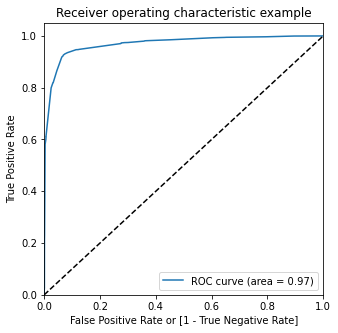

In [113]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

####  We have a very high area of 0.97 under the ROC curve which suggested that the model is a very good one.

### Step 10: Finding Optimal Cutoff Point

In [114]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_probability  Predicted  0.0  0.1  0.2  0.3  0.4  \
3009          0               0.112629          0    1    1    0    0    0   
1012          0               0.754184          1    1    1    1    1    1   
9226          0               0.015684          0    1    0    0    0    0   
4750          1               0.551054          1    1    1    1    1    1   
7987          1               0.999838          1    1    1    1    1    1   

      0.5  0.6  0.7  0.8  0.9  
3009    0    0    0    0    0  
1012    1    1    1    0    0  
9226    0    0    0    0    0  
4750    1    0    0    0    0  
7987    1    1    1    1    1

In [115]:
# Now let's calculate accuracy sensitivity and specificity at different values of probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.819871  0.970564  0.725480
0.2   0.2  0.909463  0.946852  0.886044
0.3   0.3  0.929302  0.926002  0.931370
0.4   0.4  0.929145  0.925184  0.931626
0.5   0.5  0.929775  0.919869  0.935980
0.6   0.6  0.920328  0.865495  0.954673
0.7   0.7  0.911038  0.819706  0.968246
0.8   0.8  0.907889  0.801308  0.974648
0.9   0.9  0.843804  0.604252  0.993854


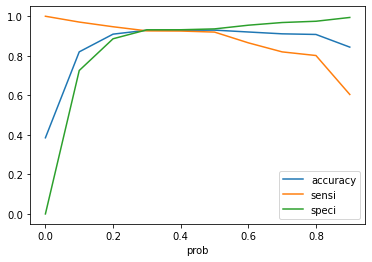

In [116]:
# We can plot it to have better visual understanding as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_probability  Predicted  0.0  0.1  0.2  0.3  0.4  \
3009          0               0.112629          0    1    1    0    0    0   
1012          0               0.754184          1    1    1    1    1    1   
9226          0               0.015684          0    1    0    0    0    0   
4750          1               0.551054          1    1    1    1    1    1   
7987          1               0.999838          1    1    1    1    1    1   

      0.5  0.6  0.7  0.8  0.9  final_predicted  
3009    0    0    0    0    0                0  
1012    1    1    1    0    0                1  
9226    0    0    0    0    0                0  
4750    1    0    0    0    0                1  
7987    1    1    1    1    1                1

In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9293024720516454

In [119]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3637,  268],
       [ 181, 2265]])

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
print('Sensitivity : {}'.format(TP/float(TP+FN)))

Sensitivity : 0.9260016353229763


In [122]:
print('Specificity : {}'.format(TN/float(TN+FP)))

Specificity : 0.9313700384122919


In [123]:
print('False Positive Rate : {}'.format(FP/ float(TN+FP)))

False Positive Rate : 0.06862996158770807


In [124]:
print('Positive Predictive Value : {}'.format(TP / float(TP+FP)))

Positive Predictive Value : 0.8941966048164233


In [125]:
print('Negative Predictive Value : {}'.format(TN / float(TN+ FN)))

Negative Predictive Value : 0.9525929806181247


### Step 11 : Precision and Recall

In [126]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3655,  250],
       [ 196, 2250]])

In [127]:
print('Precision : {}'.format(confusion[1,1]/(confusion[0,1]+confusion[1,1])))

Precision : 0.9


In [128]:
print('Recall : {}'.format(confusion[1,1]/(confusion[1,0]+confusion[1,1])))

Recall : 0.919869174161897


### Precision and recall tradeoff

In [129]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Converted, Length: 6351, dtype: int64,
 3009    0
 1012    1
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Predicted, Length: 6351, dtype: int64)

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

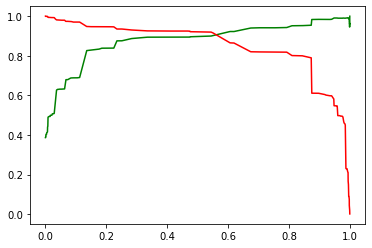

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the Test Dataset

#### Scaling of test data using Standard Scaler

In [132]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [133]:
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3271             0     0.304501                    -0.591008   
1490             0     0.666261                     1.894051   
7936             0    -0.419021                    -0.743117   
4216             0    -1.142542                    -0.878732   
3830             0     1.751544                    -0.578179   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3271              0.998931                                       0   
1490              1.564920                                       1   
7936             -0.133048                                       0   
4216             -1.265027                                       0   
3830              2.130909                                       1   

      Lead Origin_API  Lead Origin_Landing Page Submission  \
3271                1                                    0   
1490                0                                    1   
7936                1                                    0   
4216                0                                    0   
3830                0                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3271                          0                        0   
1490                          0                        0   
7936                          0                        0   
4216                          1                        0   
3830                          0                        0   

      Lead Source_Click2call  Lead Source_Direct Traffic  \
3271                       0                           0   
1490                       0                           1   
7936                       0                           0   
4216                       0                           0   
3830                       0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
3271                     0                   1                      0   
1490                     0                   0                      0   
7936                     0                   1                      0   
4216                     0                   0                      0   
3830                     0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
3271                   0                       0                           0   
1490                   0                       0                           0   
7936                   0                       0                           0   
4216                   0                       0                           0   
3830                   0                       0                           1   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
3271                              0                          0   
1490                              0                          0   
7936                              0                          0   
4216                              0                          0   
3830                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3271                      0                           0   
1490                      0                           0   
7936                      0                           0   
4216                      1                           0   
3830                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
3271                         0                    0   
1490                         0                    0   
7936                         0                    0   
4216                         0                    0   
3830                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
3271                        

In [134]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[cols6]

In [135]:
X_test.head()

Do Not Email  Lead Origin_Lead Add Form  Last Activity_SMS Sent  \
3271             0                          0                       0   
1490             0                          0                       0   
7936             0                          0                       0   
4216             0                          1                       0   
3830             0                          0                       0   

      Last Activity_Unsubscribed  \
3271                           0   
1490                           0   
7936                           0   
4216                           0   
3830                           0   

      What is your current occupation_Not Provided  \
3271                                             1   
1490                                             0   
7936                                             1   
4216                                             0   
3830                                             1   

      What is your current occupation_Working Professional  Tags_Busy  \
3271                                                  0             0   
1490                                                  1             0   
7936                                                  0             0   
4216                                                  0             0   
3830                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
3271                        0                  0             0   
1490                        0                  0             0   
7936                        0                  0             0   
4216                        1                  0             0   
3830                        0                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
3271                                         1                  0   
1490                                         1                  0   
7936                                         1                  0   
4216                                         0                  0   
3830                                         1                  0   

      Last Notable Activity_Modified  \
3271                               0   
1490                               0   
7936                               0   
4216                               1   
3830                               0   

      Last Notable Activity_Olark Chat Conversation  
3271                                              0  
1490                                              0  
7936                                              0  
4216                                              0  
3830                                              0

In [136]:
y_test

3271    0
1490    1
7936    0
4216    1
3830    0
       ..
850     0
2879    0
6501    1
7155    0
376     0
Name: Converted, Length: 2723, dtype: int64

In [137]:
#Add a constant to the test dataset
X_test_sm= sm.add_constant(X_test)

In [138]:
# Making predictions on the test set
y_test_pred = lgm6.predict(X_test_sm)

In [139]:
y_test_pred.head(10)

3271    0.112629
1490    0.958852
7936    0.112629
4216    0.991341
3830    0.112629
1800    0.958852
6507    0.063165
4821    0.007341
4223    0.994304
4714    0.224854
dtype: float64

In [140]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
y_pred_1.head()

0
3271  0.112629
1490  0.958852
7936  0.112629
4216  0.991341
3830  0.112629

In [142]:
y_test_df = pd.DataFrame(y_test)

In [143]:
y_test_df=y_test_df.rename(columns={0:'Converted'})

In [144]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

Converted         0
0          0  0.112629
1          1  0.958852
2          0  0.112629
3          1  0.991341
4          0  0.112629

In [147]:
y_pred_final= y_pred_final.rename(columns = { 0 : 'Conversion_Prob'})

In [148]:
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.112629
1          1         0.958852
2          0         0.112629
3          1         0.991341
4          0         0.112629

In [149]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [150]:
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.112629                0
1          1         0.958852                1
2          0         0.112629                0
3          1         0.991341                1
4          0         0.112629                0

#### Overall Accuracy

In [151]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.9217774513404333

In [152]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1606,  128],
       [  85,  904]])

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Finding the sensitivity and specificity 

In [154]:
print('Sensitivity : {}'.format(TP/float(TP+FN)))

Sensitivity : 0.9140546006066734


In [155]:
print('Specificity : {}'.format(TN/float(TN+FP)))

Specificity : 0.9261822376009228


### Finding the important features from our model

In [156]:
lgm6.params.sort_values(ascending=False)

Tags_Lost to EINS                                       11.259006
Tags_Closed by Horizzon                                  8.580709
Tags_Will revert after reading the email                 5.290871
Last Activity_Unsubscribed                               2.515638
Tags_Busy                                                2.433862
Last Activity_SMS Sent                                   2.269097
What is your current occupation_Working Professional     1.217826
Lead Origin_Lead Add Form                                0.962443
Last Notable Activity_Modified                          -1.442533
Tags_switched off                                       -1.546776
Tags_Ringing                                            -1.605716
Last Notable Activity_Olark Chat Conversation           -1.752485
Do Not Email                                            -2.027510
const                                                   -3.360132
What is your current occupation_Not Provided            -3.994905
dtype: flo

## Results from the Model : 

### Comparing the different metrics obtained from the model
##### Train Data :
##### Accuracy : 92.9%
##### Sensitivity : 92.6%
##### Specificity : 93.1%

#### Test Data : 

##### Accuracy : 92.1%
##### Sensitivity: 91.4%
##### Specificity: 92.6%

#### The above scores indicate that the model derived using the training data is able to bring the same performance on the test data as well. Though the requirement is to achieve a score of 80%, the model has has achieved way beyond the required score and shows that the model is good.